In [6]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf

In [7]:
(X_train, y_train), (X_test, y_test) = k.datasets.cifar10.load_data()

print("******************")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

******************
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
# Convert class vectors to binary class matrices using one hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

In [9]:
# Data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255
X_test /= 255

print("******************")
print(X_train.shape)
print(y_train_ohe.shape)
print(X_test.shape)
print(y_test_ohe.shape)

******************
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [10]:
X_val = X_train[40000:]
y_val = y_train_ohe[40000:]
print(X_val.shape)
print(y_val.shape)

(10000, 32, 32, 3)
(10000, 10)


In [11]:
X_train = X_train[:40000]
y_train_ohe = y_train_ohe[:40000]
print(X_train.shape)
print(y_train_ohe.shape)

(40000, 32, 32, 3)
(40000, 10)


In [7]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

In [8]:
#Define the sequential model and add th VGG's layers to it
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 15,111,242 (57.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# initiate SGD optimizer
sgd = SGD(learning_rate=0.001, momentum=0.9)

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])


def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

# cp_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint_vgg16_2.keras', verbose=1, save_weights_only=False, save_best_only=True)
mc = ModelCheckpoint('./weights.keras', monitor='val_accuracy', save_best_only=True, mode='max')

In [10]:
# initialize the number of epochs and batch size
EPOCHS = 20
BS = 128

In [11]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15,
    horizontal_flip=True, 
    fill_mode="nearest")

In [12]:
# train the model
history = model.fit(
    aug.flow(X_train,y_train_ohe, batch_size=BS),
    validation_data=(X_val,y_val),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS,
    callbacks=[reduce_lr,mc])

Epoch 1/20


c:\Users\Хр\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2536s 8s/step - accuracy: 0.2493 - loss: 2.0444 - val_accuracy: 0.6346 - val_loss: 1.0610 - learning_rate: 0.0010
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 52:26 10s/step - accuracy: 0.5625 - loss: 1.2634

c:\Users\Хр\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


312/312 ━━━━━━━━━━━━━━━━━━━━ 223s 686ms/step - accuracy: 0.5625 - loss: 1.2634 - val_accuracy: 0.6297 - val_loss: 1.0740 - learning_rate: 0.0010
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2729s 9s/step - accuracy: 0.5733 - loss: 1.2399 - val_accuracy: 0.6813 - val_loss: 0.9139 - learning_rate: 0.0010
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 198s 611ms/step - accuracy: 0.6016 - loss: 1.1108 - val_accuracy: 0.6916 - val_loss: 0.8883 - learning_rate: 0.0010
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2893s 9s/step - accuracy: 0.6542 - loss: 1.0198 - val_accuracy: 0.7423 - val_loss: 0.7551 - learning_rate: 0.0010
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 200s 618ms/step - accuracy: 0.7109 - loss: 0.8584 - val_accuracy: 0.7300 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1842s 6s/step - accuracy: 0.6934 - loss: 0.9063 - val_accuracy: 0.7530 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 99s 305ms/step - accuracy: 0.6328 - loss:

In [14]:
loss, accuracy = model.evaluate(X_test, y_test_ohe)
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test loss: {loss:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 384ms/step - accuracy: 0.8203 - loss: 0.5404
Test accuracy: 0.82
Test loss: 0.54


In [16]:
#We load the best weights saved by the ModelCheckpoint
model.load_weights('./weights.keras')

In [17]:
loss, accuracy = model.evaluate(X_test, y_test_ohe)
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test loss: {loss:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 378ms/step - accuracy: 0.8231 - loss: 0.5338
Test accuracy: 0.82
Test loss: 0.53


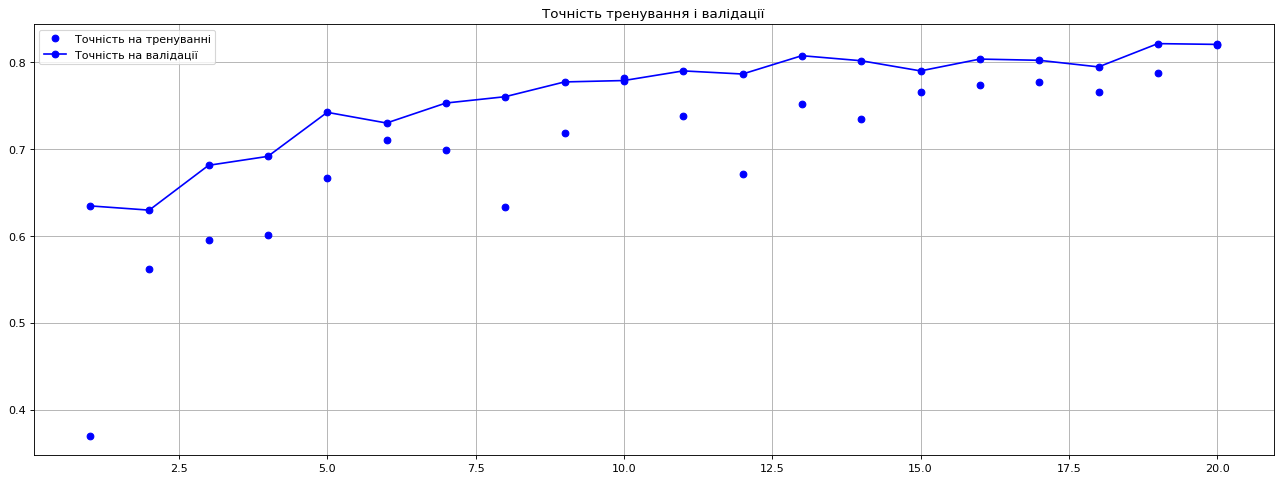

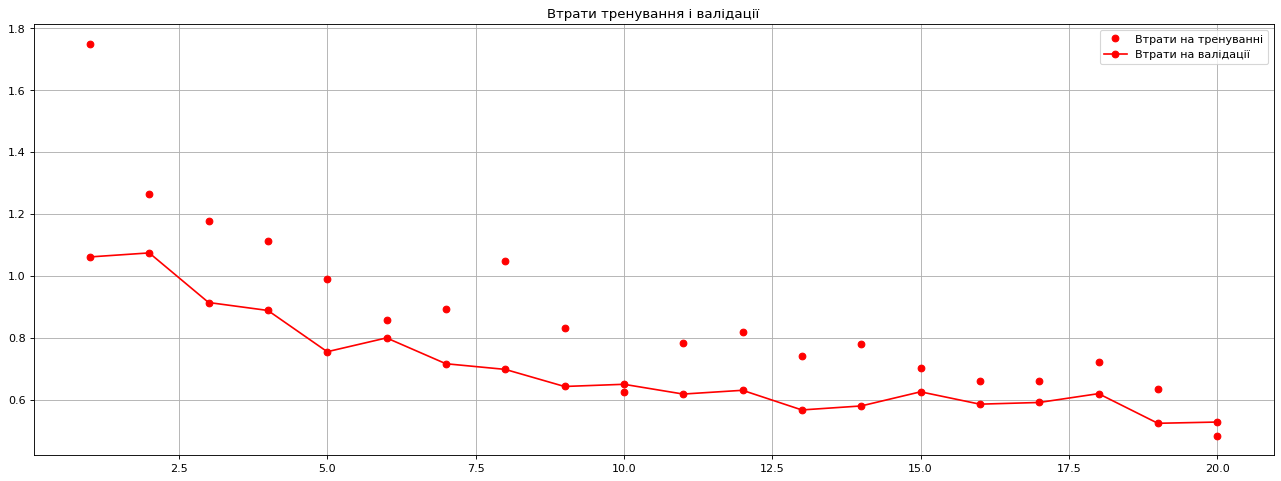

In [18]:
from matplotlib import pyplot as plt


# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', marker='o', label='Точність на валідації')  
plt.title('Точність тренування і валідації') 
plt.legend() 
plt.grid(True)
plt.show()  


plt.figure(figsize=(20, 7), dpi=80)

plt.plot(epochs, loss, 'ro', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'r', marker='o', label='Втрати на валідації')
plt.title('Втрати тренування і валідації') 
plt.legend()


plt.grid(True)
plt.show()  

In [22]:
import numpy as np
from tensorflow.keras.models import load_model

In [23]:
model = load_model('vgg16.keras')

In [24]:
loss, accuracy = model.evaluate(X_test, y_test_ohe)
print('Test loss: {}\nTest accuracy after: {}'.format(accuracy, loss))

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation loss: {}\nValidation accuracy: {}'.format(val_loss, val_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 390ms/step - accuracy: 0.8778 - loss: 0.3805
Test loss: 0.878000020980835
Test accuracy after: 0.3794576823711395
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 465ms/step - accuracy: 0.8909 - loss: 0.3499
Validation loss: 0.35657528042793274
Validation accuracy: 0.8867999911308289


In [25]:
# Get an image from the test data to feed it into the network. Since the input of the network has to
# be 4-dimensional, we add a first dimension by reshaping the image.
first_image = X_test[0]
first_image_4d = np.reshape(first_image, (1, 32, 32, 3))

# Run the prediction on the loaded model
predicted_class_probabilities = model.predict(first_image_4d)

# Get the index of the class with the highest probability and print it.
predicted_class = np.argmax(predicted_class_probabilities)
print("Prediction: ", predicted_class, "  Expected: ", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
Prediction:  3   Expected:  [3]
